# Simple clustering

In [ ]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans, DBSCAN

In [ ]:
from scipy.spatial.distance import cdist
from matplotlib.patches import Ellipse

def plot_kmeans(est, X, n_clusters=4, rseed=0, ax=None):
    labels = est.fit_predict(X)

    # plot the input data
    fig = plt.figure()
    ax = ax or plt.gca()
#     ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, zorder=2)

    # plot the representation of the KMeans model
    centers = est.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))
        
def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        try:
            angle = 0
            width, height = 2 * np.sqrt(covariance)
        except:
            angle = 0
            width, height = (2 * np.sqrt(covariance), 2 * np.sqrt(covariance))
            
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covariances_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)


## Data prep

In [ ]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams['image.aspect'] = 'equal'

n_samples = 1500
random_state = 42
n_clusters = 5

### Define dataset
X, y = datasets.make_blobs(n_samples=n_samples, centers=n_clusters,
                           cluster_std=0.9,
                          #  cluster_std=[0.5, 2.5, 0.5, 1.6, 0.6][:n_clusters],
                           random_state=random_state)

# X, y = datasets.make_moons(n_samples=n_samples, noise=.05)
# X, y = datasets.make_circles(n_samples=n_samples, factor=.5,noise=.03)

### Define transformations
transformation = [[0.60834549, -0.63667341], [-0.40887718, 0.85253229]]
X_aniso = np.dot(X, transformation)
X_filtered = np.vstack((X[y == 0][:500], X[y == 1][:100], X[y == 2][:10]))
y_filtered = np.hstack((y[y == 0][:500], y[y == 1][:100], y[y == 2][:10]))

# X = X_aniso
# y = y_filtered; n_clusters=3

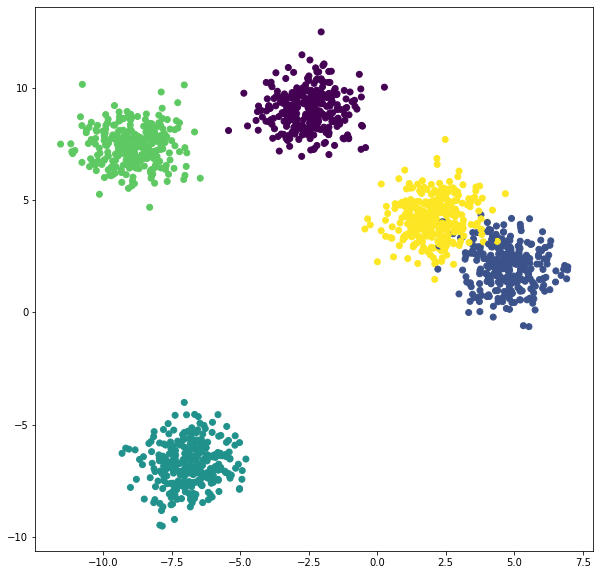

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y)

## Kmeans fit

In [ ]:
est.cluster_centers_.shape

(5, 2)

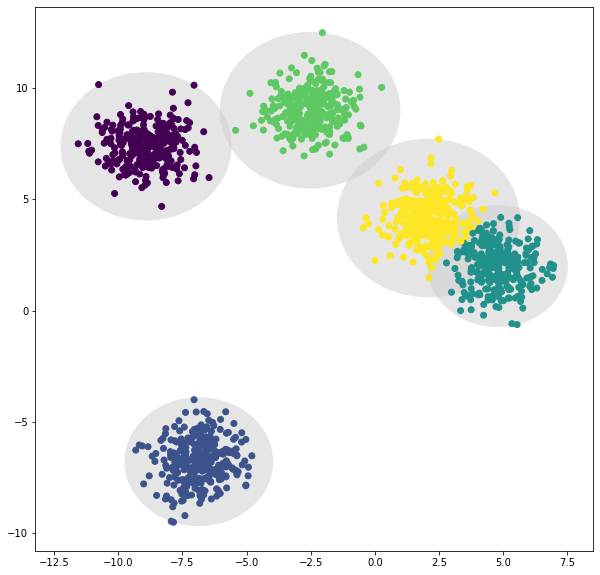

In [ ]:
est = KMeans(n_clusters)
est.fit(X)
y_kmeans = est.predict(X)

# fig = plt.figure(figsize=(10,10))
# plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='rainbow')
# plt.show()
plot_kmeans(est, X, n_clusters=n_clusters)

## plot decision boundaries

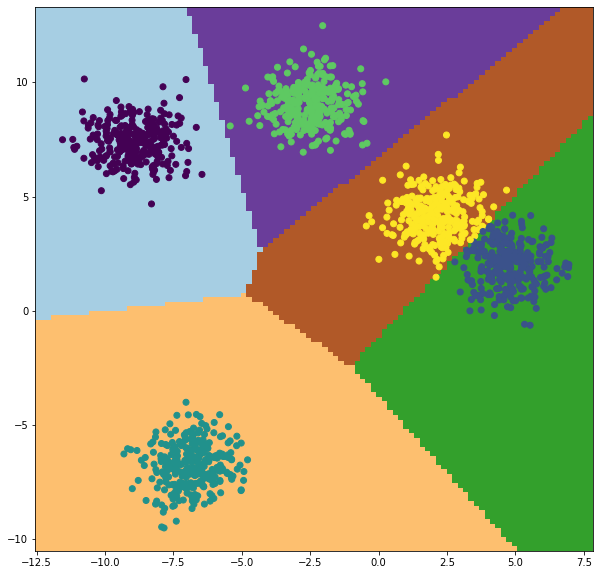

In [ ]:
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.2), np.arange(y_min, y_max, 0.2))

# Obtain labels for each point in mesh. Use last trained model.
Z = est.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)

plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.scatter(X[:, 0], X[:, 1], c=y_kmeans)

## Q
What is the WCSS (also known as inertia) of the clustering above?

In [ ]:
est.inertia_

4108.61980170307

[VQ & Digits](https://colab.research.google.com/drive/16-mg763ECcosKx_FRkjoLegZiz3hgjHK?usp=sharing)

# Back to lecture

# GMM

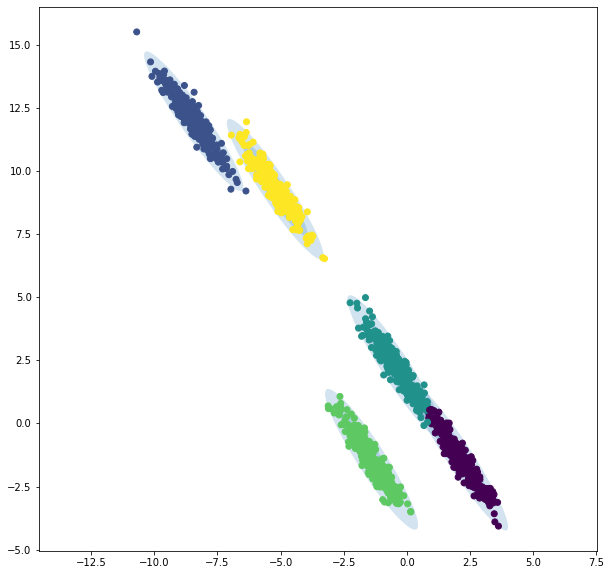

In [ ]:
# X_orig = X

X = X_aniso
# X = X_orig

gmm = GaussianMixture(n_clusters, covariance_type='full') # diag, full, spherical
gmm.fit(X)
y_gmm = gmm.predict(X)

# plt.scatter(X[:, 0], X[:, 1], c=y_gmm, cmap='rainbow')
plot_gmm(gmm, X)

## Optimal number of clusters

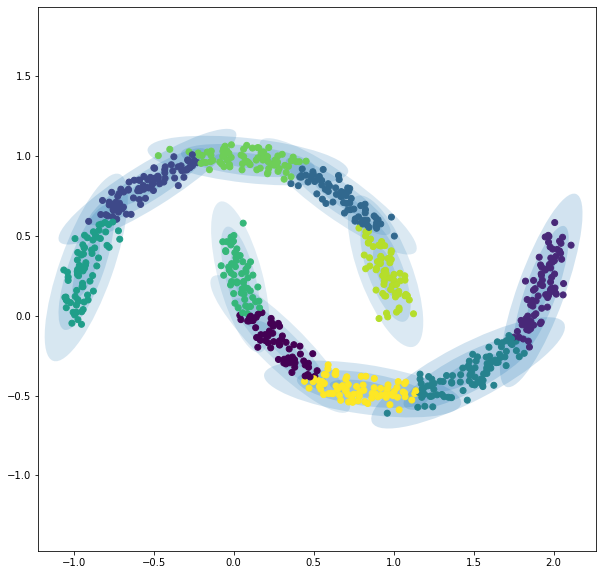

In [ ]:
X, y = datasets.make_moons(n_samples=int(n_samples/2), noise=.05)
# plt.scatter(X[:, 0], X[:, 1])

gmm = GaussianMixture(10, covariance_type='full') # diag, full, spherical
plot_gmm(gmm, X)

Text(0.5, 0, 'n_components')

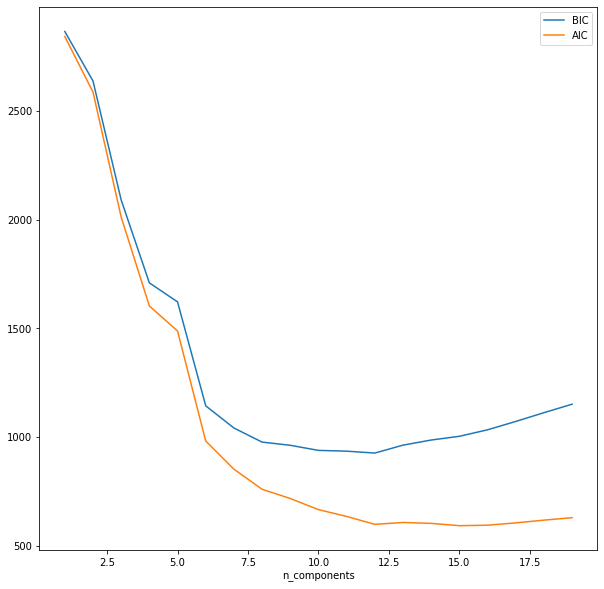

In [ ]:
n_components = np.arange(1, 20)
models = [GaussianMixture(n, covariance_type='full', random_state=0).fit(X)
          for n in n_components]

plt.plot(n_components, [m.bic(X) for m in models], label='BIC')
plt.plot(n_components, [m.aic(X) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')